# LIST1

Below are solutions to the exercises of list 1

In [ ]:
#import imageio
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

The function below, simulates the forest fire that is required in the exercise. The fire spreads to 8 neighbors of the burning tree, I didn't implement circular boundry conditions and instead considered the edge of the lattice as the edge of the forest. There are fragments of the code that are commented out, because they slow down the simulation and were only required to save frames of the animation.

In [ ]:
def forest(L,d):
    #1-tree,0-empty,2-burning,-1-burned

    ###
    #states=[]
    ###

    #initialize the forest 
    lattice=np.random.choice([0, 1], size=[L,L], p=[1-d, d])

    ###
    #states.append(lattice.copy())
    ###
    #initial step, fire on the left side
    for i in range(len(lattice[:,0])):
        if lattice[i,0]==1:
            lattice[i,0]=2
    ###        
    #states.append(lattice.copy())
    ###

    # while there are still trees burning, the fire spreads according to the rules of the excercise
    while 2 in lattice:
        for i in range(L):
            for j in range(L):
                if lattice[i,j]==2:
                    lattice[i,j]=-1
        for i in range(L):
            
            for j in range(L):
                #when fire in the middle
                if i not in [0,L-1] and j not in [0,L-1]:
                    if lattice[i,j]==1:
                        for id1 in [-1,0,1]:
                            for id2 in [-1,0,1]:
                                if lattice[i+id1,j+id2]==-1:
                                    lattice[i,j]=2
                                        
                #below are boundry conditions of the forest's edges                                 

                elif i in [0,L-1]:
                    if lattice[i,j]==1:
                        if i==0:
                            if j==0:
                                if lattice[i+1,j]==-1 or lattice[i,j+1]==-1 or lattice[i+1,j+1]==-1:
                                    lattice[i,j]=2 
                            if j==L-1:
                                if lattice[i+1,j]==-1 or lattice[i,j-1]==-1 or lattice[i+1,j-1]==-1:
                                    lattice[i,j]=2
                            else:
                                if lattice[i+1,j]==-1 or lattice[i,j-1]==-1 or lattice[i,j+1]==-1 or lattice[i+1,j-1]==-1 or lattice[i+1,j-1]==-1:
                                    lattice[i,j]=2
                        elif i==L-1:
                            if j==0:
                                if lattice[i-1,j]==-1 or lattice[i,j+1]==-1 or lattice[i-1,j+1]==-1:
                                    lattice[i,j]=2 
                            if j==L-1:
                                if lattice[i-1,j]==-1 or lattice[i,j-1]==-1 or lattice[i-1,j-1]==-1:
                                    lattice[i,j]=2 
                            else:
                                if lattice[i-1,j]==-1 or lattice[i,j-1]==-1 or lattice[i,j+1]==-1 or lattice[i-1,j+1]==-1 or lattice[i-1,j+1]==-1:
                                    lattice[i,j]=2
                elif j in [0,L-1]:
                    if lattice[i,j]==1:
                        if j==0:
                            if i==0:
                                if lattice[i+1,j]==-1 or lattice[i,j+1]==-1 or lattice[i+1,j+1]==-1:
                                    lattice[i,j]=2 
                            if i==L-1:
                                if lattice[i-1,j]==-1 or lattice[i,j+1]==-1 or lattice[i-1,j+1]==-1:
                                    lattice[i,j]=2
                            else:
                                if lattice[i+1,j]==-1 or lattice[i-1,j]==-1 or lattice[i,j+1]==-1 or lattice[i+1,j+1]==-1 or lattice[i-1,j+1]==-1:
                                    lattice[i,j]=2
                        elif j==L-1:
                            if i==0:
                                if lattice[i+1,j]==-1 or lattice[i,j-1]==-1 or lattice[i+1,j-1]==-1:
                                    lattice[i,j]=2 
                            if i==L-1:
                                if lattice[i-1,j]==-1 or lattice[i,j-1]==-1 or lattice[i-1,j-1]==-1:
                                    lattice[i,j]=2 
                            else:
                                if lattice[i,j-1]==-1 or lattice[i-1,j]==-1 or lattice[i+1,j]==-1 or lattice[i-1,j-1]==-1 or lattice[i+1,j-1]==-1:
                                    lattice[i,j]=2
        ###
        #states.append(lattice.copy())
        ###

    return lattice #states

The function below is used to simulate the percolation parameter.

In [ ]:
def simulation_percolation(L,ds,steps): #function for simulation
    fin=[]
    for d in ds:
        A=0
        for i in range(steps):   
            A1=forest(L,d)
            if -1 in A1[:,L-1]:
                A+=1/steps           
        fin.append(A)
    return fin



The simulations were performed for forest sizes of 20, 50, 100 and forest density values ranging from 0.25 to 0.75, with 0.05 step. Each simulation was averaged over 200 iterations. 

In [ ]:
ds=np.arange(0.25,0.8,0.05)
L20=simulation_percolation(20,ds,200)
L50=simulation_percolation(50,ds,200)
L100=simulation_percolation(100,ds,200)


Below are the plots for different simulation results, the percolation threshold should be where the graphs are crossing each other, but because of low value of iteration, the result values vary around 0.45.

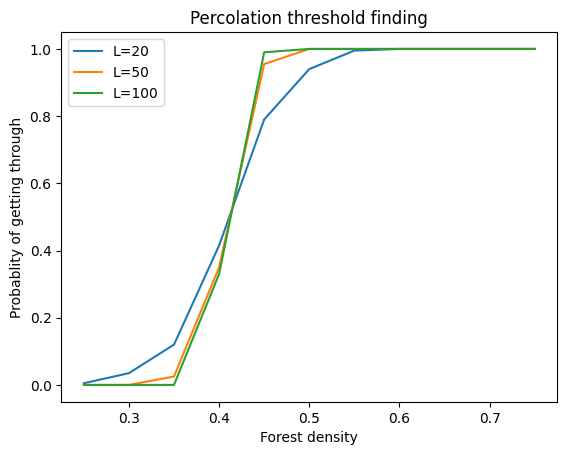

In [ ]:
plt.title("Percolation threshold finding")
plt.plot(ds,L20,label="L=20")
plt.plot(ds,L50,label="L=50")
plt.plot(ds,L100,label="L=100")
plt.xlabel("Forest density")
plt.ylabel("Probablity of getting through")
plt.legend()
plt.show()



Below is the implementation of  Hoshen-Kopelman algorithm, to find the maximum size of burned trees cluster. In this approach I scan the lattice and check the neighbors depending on the placement of the current node (to avoid problems on the boundry of the matrix). The function only returns the value of the biggest cluster. The resulting matrix inside the function is mislabeled, because it lacks the last "cleaning" part, which I omitted because it wasn't required in the exercise. For the matrix to be labeled properly it requires one more loop through its values and comparing them with labels dictonary.

In [ ]:
def HK_alg_maxcluster(X):
    #defining variables and labels
    M=X.copy()
    m_len=len(M[:,0])
    
    l1=range(1,m_len*m_len)
    labels=dict.fromkeys(l1,0)
    
    #preprocessing the matrix
    for i in range(m_len):
        for j in range(m_len):
            if M[i,j]!=-1:
                M[i,j]=0
    #first row done separately
    temp_key=0
    for j in range(m_len):
        if M[0,j]==-1:
            if (j-1>=0 and M[0,j-1]==0) or j-1<0:
                temp_key+=1
                labels[temp_key]+=1
                M[0,j]=temp_key
            elif (j-1>=0 and M[0,j-1]!=0):
                labels[temp_key]+=1
                M[0,j]=temp_key
    # the algorythm
    for i in range(1,m_len):
        for j in range(m_len):
            if M[i,j]==-1:
                if j-1<0:
                    nbhd=np.unique(np.array([M[i-1,j], M[i-1,j+1]]))
                    new_nbhd = np.delete(nbhd, np.where(nbhd == 0))
                    if len(new_nbhd)>0:
                        M[i,j]=min(new_nbhd)
                        cnt=1
                        for el in new_nbhd:
                            if el!=min(new_nbhd):
                                cnt+=1
                                labels[el]=-min(new_nbhd)
                        labels[min(new_nbhd)] += cnt     
                    
                    else:
                        value = min({i for i in labels if labels[i]==0})
                        labels[value]+=1
                        M[i,j]=value
                elif (j-1>=0 and j+1<m_len):
                    nbhd=np.unique(np.array([M[i-1,j], M[i-1,j+1],M[i,j-1],M[i-1,j-1]]))
                    new_nbhd = np.delete(nbhd, np.where(nbhd == 0))
                    if len(new_nbhd)>0:
                        M[i,j]=min(new_nbhd)
                        cnt=1
                        for el in new_nbhd:
                            if el!=min(new_nbhd):
                                cnt+=1
                                labels[el]=-min(new_nbhd)
                        labels[min(new_nbhd)] += cnt

                    else:
                        value = min({i for i in labels if labels[i]==0})
                        labels[value]+=1
                        M[i,j]=value
                elif j+1>=m_len:
                    nbhd=np.unique(np.array([M[i-1,j],M[i,j-1],M[i-1,j-1]]))
                    new_nbhd = np.delete(nbhd, np.where(nbhd == 0))
                    if len(new_nbhd)>0:
                        M[i,j]=min(new_nbhd)
                        cnt=1
                        for el in new_nbhd:
                            if el!=min(new_nbhd):
                                cnt+=1
                                labels[el]=-min(new_nbhd)
                        labels[min(new_nbhd)] += cnt
                    else:
                        value = min({i for i in labels if labels[i]==0})
                        labels[value]+=1
                        M[i,j]=value                        


    #returns just the value of the largest cluster
    max_cluster=labels[max(labels, key=labels.get)] 
    return max_cluster
    

Code below is the simulation of the average biggest cluster size for grid of length 100.  The forest density values range from 0.05 to 0.95 with 0.15 step. They are averaged over 100 iterations. 

In [ ]:
#symulating the average size of largest cluster

ds1=np.arange(0.05,1.0,0.15)
def cluster_sim(ds1):
    vals=[]
    for d in ds1:
        val=0
        for i in range(100):
            A=forest(100,d)
            val+=HK_alg_maxcluster(A)/100
        vals.append(val)    
    return vals
vals=cluster_sim(ds1)

Below is the plot of the simulated sizes by forest density. 

Text(0, 0.5, 'Cluster size')

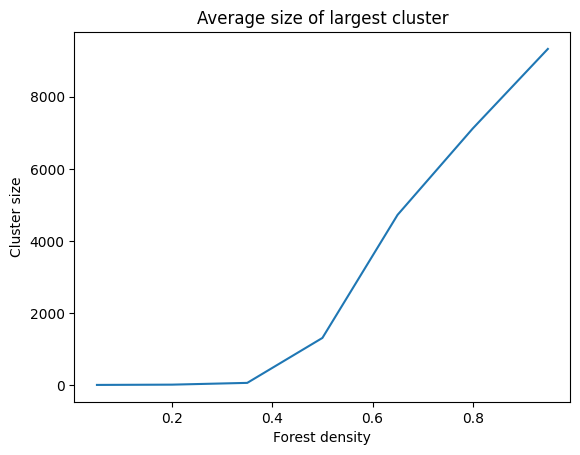

In [ ]:
plt.plot(ds1,vals)
plt.title("Average size of largest cluster")
plt.xlabel("Forest density")
plt.ylabel("Cluster size")


Code below was used to generate the animation of the simulation.


In [ ]:

#colors = [ "#4d3932", "#8f852b","#008000", "#f05518"]
#values = [ -1 , 0, 1 , 2 ]
#
#norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values))  
#normed_vals = norm(values)
#
#cmap = LinearSegmentedColormap.from_list("mypalette", list(zip(normed_vals, colors)), N=1000)
#
#count=0
#for i in range(len(A)):
#    count+=1
#    plt.imshow(A[i],cmap=cmap)
#    plt.savefig(f'images_1/frame_{i}.png', 
#                transparent = False,  
#                facecolor = 'white'
#            )
    

In [ ]:
#frames = []
#for t in range(count):
#   image = imageio.v2.imread(f'images_1/frame_{t}.png')
#   frames.append(image)
#
#imageio.mimsave('forest_fire.gif', # output gif
#                frames,
#                format='GIF',          
#                duration=15,)         # optional: frames per second


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3ec5c87c-f518-4cc9-8f2b-953db59a48eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>